## Análisis EDA: Sistema de recomendación

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_movies_released = pd.read_csv('C:/Users/Usuario/Desktop/Data Science/SoyHenry/PI1_files/1508/movies_released.csv')
df_filtered_credits_crew = pd.read_csv('C:/Users/Usuario/Desktop/Data Science/SoyHenry/PI1_files/archivos actuales/filtered_credits_crew.csv')
df_cast_nochar = pd.read_csv('C:/Users/Usuario/Desktop/Data Science/SoyHenry/PI1_files/1508/cast_nochar.csv')

En este notebook vamos a estar analizando los datasets que nos fueron otorgados para preparar nuestra api y ejecutar nuestro sistema de recomendación.
Iremos recorriendo algunas métricas y gráficos que nos ilustrarán dimensiones y relaciones de y entre nuestros datos.
Adelante!

In [248]:
# Arrancamos con métricas de estadística básicas para dimensionar nuestros datasets
'''Análisis estadístico de datos'''
# Detalles de columnas númericas en Movies
print(df_movies_released.describe())

             BUDGET             ID    POPULARITY       REVENUE       RUNTIME  \
count  4.493600e+04   44936.000000  44936.000000  4.493600e+04  44696.000000   
mean   4.226972e+06  107770.449528      6.168693  1.133855e+07     94.315330   
std    1.736872e+07  112016.117651    168.311091  6.469487e+07     38.300509   
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000   
25%    0.000000e+00   26173.750000      0.394633  0.000000e+00     85.000000   
50%    0.000000e+00   59522.000000      1.141203  0.000000e+00     95.000000   
75%    0.000000e+00  156598.500000      3.760175  0.000000e+00    107.000000   
max    3.800000e+08  469172.000000  21259.000000  2.787965e+09   1256.000000   

       VOTE_AVERAGE    VOTE_COUNT  RELEASE_YEAR        RETURN  
count  44936.000000  44936.000000  44936.000000  4.493600e+04  
mean       5.629380    111.079179   1991.819677  6.665034e+02  
std        1.907455    494.036416     24.072588  7.505807e+04  
min        0.000000    

In [249]:
# Detalles de columnas númericas en Crew
'''Nótese que es simplemente que al ser Id la única columna numérica de Crew este paso carece de valor útil'''
print(df_filtered_credits_crew.describe())

                  id
count  362818.000000
mean    96315.137380
std    115515.325544
min         2.000000
25%     12100.000000
50%     43074.000000
75%    136835.000000
max    469172.000000


In [250]:
# Detalles de columnas númericas en Cast
print(df_cast_nochar.describe())

            cast_id        gender             id
count  63025.000000  63025.000000   63025.000000
mean      40.475034      1.318350  106620.699389
std      169.763271      0.786814  113661.086348
min        0.000000      0.000000      66.000000
25%        4.000000      1.000000   22309.000000
50%        7.000000      2.000000   56648.000000
75%       14.000000      2.000000  157829.000000
max     1071.000000      2.000000  464111.000000


Confirmamos haber tratado correctamente los duplicados y nulos en ETL_PI1.ipynb

In [251]:
# Corroboramos el resultado de nuestro tratamiento ETL con respecto a nuestros duplicados en nuestros datasets
'''Valores duplicados'''
# Duplicados de Movies
print(df_movies_released.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
44931    False
44932    False
44933    False
44934    False
44935    False
Length: 44936, dtype: bool


In [252]:
# Duplicados de Cast
print(df_cast_nochar.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
63020    False
63021    False
63022    False
63023    False
63024    False
Length: 63025, dtype: bool


In [253]:
# Duplicados de Crew
print(df_filtered_credits_crew.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
362813    False
362814    False
362815    False
362816    False
362817    False
Length: 362818, dtype: bool


In [254]:
# Corroboramos el resultado de nuestro tratamiento ETL con respecto a nuestros nulos en nuestros datasets
'''Chequeo de Nulos'''
# Nulos de Movies
'''(Observamos que Overview y Runtime tienen nulos que decidimos dejar dado que
los datos existentes son útiles y los ausentes no perjudican nuestros objetivos)'''
nulls_info = df_movies_released.isnull().sum()
print("Chequeo de Nulos:")
print(nulls_info)

Chequeo de Nulos:
BUDGET                               0
ID                                   0
ORIGINAL_LANGUAGE                    0
OVERVIEW                           907
POPULARITY                           0
RELEASE_DATE                         0
REVENUE                              0
RUNTIME                            240
STATUS                               0
TITLE                                0
VOTE_AVERAGE                         0
VOTE_COUNT                           0
PRODUCTION_COMPANIES_ID              0
PRODUCTION_COMPANIES_NAME            0
PRODUCTION_COUNTRIES_ISO_3166_1      0
PRODUCTION_COUNTRIES_NAME            0
SPOKEN_LANGUAGES_ISO_639_1           0
SPOKEN_LANGUAGES_NAME                0
GENRES_ID                            0
GENRES_NAME                          0
RELEASE_YEAR                         0
RETURN                               0
dtype: int64


In [255]:
# Nulos de Crew
nulls_info = df_filtered_credits_crew.isnull().sum()
print("Chequeo de Nulos:")
print(nulls_info)

Chequeo de Nulos:
credit_id     0
department    0
id            0
job           0
name          0
dtype: int64


In [256]:
# Nulos de Cast
nulls_info = df_cast_nochar.isnull().sum()
print("Chequeo de Nulos:")
print(nulls_info)

Chequeo de Nulos:
cast_id      0
credit_id    0
gender       0
id           0
name         0
dtype: int64


In [257]:
# En este paso vamos a expresar en porcentaje nuestros nulos a modo de métrica para los valores faltantes
'''Valores faltantes'''
# Porcentaje de valores faltantes de Movies por columna
missing_percentage = df_movies_released.isnull().mean() * 100
formatted_missing_percentage = missing_percentage.apply(lambda x: f'{x:.2f}%')

print("Porcentaje de valores faltantes por columna:")
print(formatted_missing_percentage)

Porcentaje de valores faltantes por columna:
BUDGET                             0.00%
ID                                 0.00%
ORIGINAL_LANGUAGE                  0.00%
OVERVIEW                           2.02%
POPULARITY                         0.00%
RELEASE_DATE                       0.00%
REVENUE                            0.00%
RUNTIME                            0.53%
STATUS                             0.00%
TITLE                              0.00%
VOTE_AVERAGE                       0.00%
VOTE_COUNT                         0.00%
PRODUCTION_COMPANIES_ID            0.00%
PRODUCTION_COMPANIES_NAME          0.00%
PRODUCTION_COUNTRIES_ISO_3166_1    0.00%
PRODUCTION_COUNTRIES_NAME          0.00%
SPOKEN_LANGUAGES_ISO_639_1         0.00%
SPOKEN_LANGUAGES_NAME              0.00%
GENRES_ID                          0.00%
GENRES_NAME                        0.00%
RELEASE_YEAR                       0.00%
RETURN                             0.00%
dtype: object


In [258]:
# Porcentaje de valores faltantes de Crew por columna
missing_percentage = df_filtered_credits_crew.isnull().mean() * 100
formatted_missing_percentage = missing_percentage.apply(lambda x: f'{x:.2f}%')

print("Porcentaje de valores faltantes por columna:")
print(formatted_missing_percentage)

Porcentaje de valores faltantes por columna:
credit_id     0.00%
department    0.00%
id            0.00%
job           0.00%
name          0.00%
dtype: object


In [259]:
# Porcentaje de valores faltantes de Cast por columna
missing_percentage = df_cast_nochar.isnull().mean() * 100
formatted_missing_percentage = missing_percentage.apply(lambda x: f'{x:.2f}%')

print("Porcentaje de valores faltantes por columna:")
print(formatted_missing_percentage)

Porcentaje de valores faltantes por columna:
cast_id      0.00%
credit_id    0.00%
gender       0.00%
id           0.00%
name         0.00%
dtype: object


In [260]:
# Recorreremos cada columna de nuestros datasets para visualizar nuestros tipo de datos
'''Tipos de datos'''
# Tipos de datos en Movies
data_types = df_movies_released.dtypes
print("Tipos de Datos en cada Columna en Movies:")
print(data_types)

Tipos de Datos en cada Columna en Movies:
BUDGET                             float64
ID                                   int64
ORIGINAL_LANGUAGE                   object
OVERVIEW                            object
POPULARITY                         float64
RELEASE_DATE                        object
REVENUE                            float64
RUNTIME                            float64
STATUS                              object
TITLE                               object
VOTE_AVERAGE                       float64
VOTE_COUNT                         float64
PRODUCTION_COMPANIES_ID             object
PRODUCTION_COMPANIES_NAME           object
PRODUCTION_COUNTRIES_ISO_3166_1     object
PRODUCTION_COUNTRIES_NAME           object
SPOKEN_LANGUAGES_ISO_639_1          object
SPOKEN_LANGUAGES_NAME               object
GENRES_ID                           object
GENRES_NAME                         object
RELEASE_YEAR                         int64
RETURN                             float64
dtype: objec

In [261]:
# Tipos de datos en Cast
data_types = df_cast_nochar.dtypes
print("Tipos de Datos en cada Columna en Cast:")
print(data_types)

Tipos de Datos en cada Columna en Cast:
cast_id       int64
credit_id    object
gender        int64
id            int64
name         object
dtype: object


In [262]:
# Tipos de datos en Crew
data_types = df_filtered_credits_crew.dtypes
print("Tipos de Datos en cada Columna en Crew:")
print(data_types)

Tipos de Datos en cada Columna en Crew:
credit_id     object
department    object
id             int64
job           object
name          object
dtype: object


In [263]:
# Ahora vamos a visualizar correlaciones entre variables númericas
'''Matriz de Correlación'''
# Correlaciones entre datos en Movies

# Filtrar solo las columnas numéricas
numeric_df = df_movies_released.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
                BUDGET        ID  POPULARITY   REVENUE   RUNTIME  \
BUDGET        1.000000 -0.101087    0.043739  0.759143  0.134358   
ID           -0.101087  1.000000   -0.003897 -0.071059 -0.119996   
POPULARITY    0.043739 -0.003897    1.000000  0.032929  0.010006   
REVENUE       0.759143 -0.071059    0.032929  1.000000  0.103953   
RUNTIME       0.134358 -0.119996    0.010006  0.103953  1.000000   
VOTE_AVERAGE  0.072381 -0.167593    0.010008  0.084084  0.156480   
VOTE_COUNT    0.668581 -0.064554    0.035237  0.811964  0.113462   
RELEASE_YEAR  0.132459  0.284857    0.012136  0.089178  0.080273   
RETURN       -0.002153 -0.006778   -0.000056  0.000776  0.000865   

              VOTE_AVERAGE  VOTE_COUNT  RELEASE_YEAR    RETURN  
BUDGET            0.072381    0.668581      0.132459 -0.002153  
ID               -0.167593   -0.064554      0.284857 -0.006778  
POPULARITY        0.010008    0.035237      0.012136 -0.000056  
REVENUE           0.084084    0.8119

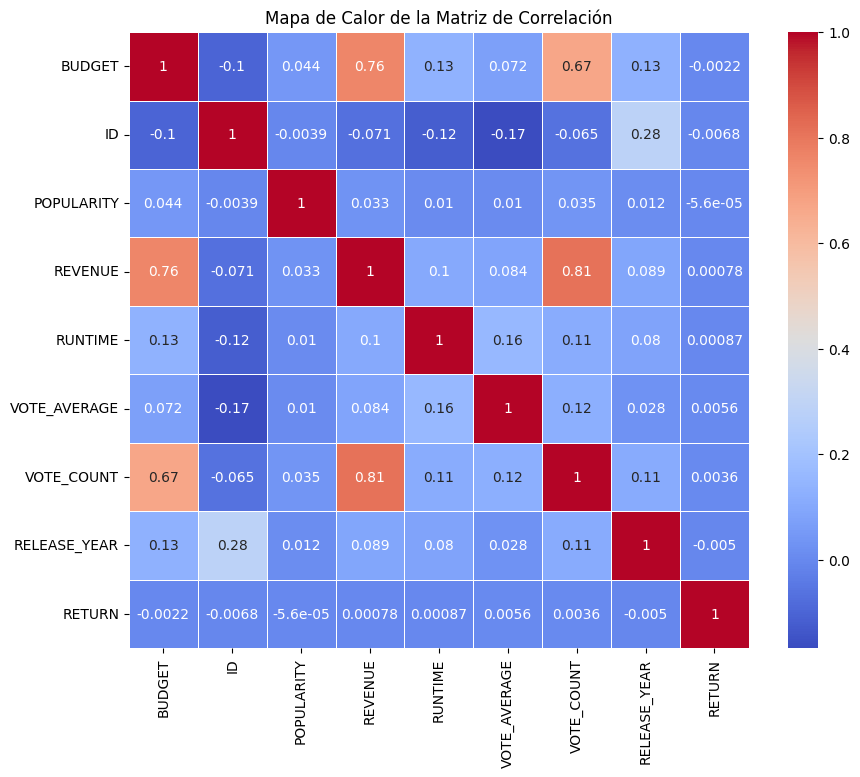

In [264]:
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

In [265]:
# Correlaciones entre datos en Cast
'''Si bien no vamos a usar para el sistema de recomendación este dataset,
veremos sus correlaciones a manera de práctica'''
# Filtrar solo las columnas numéricas
numeric_df = df_cast_nochar.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
          cast_id    gender        id
cast_id  1.000000 -0.049444 -0.066398
gender  -0.049444  1.000000 -0.119187
id      -0.066398 -0.119187  1.000000


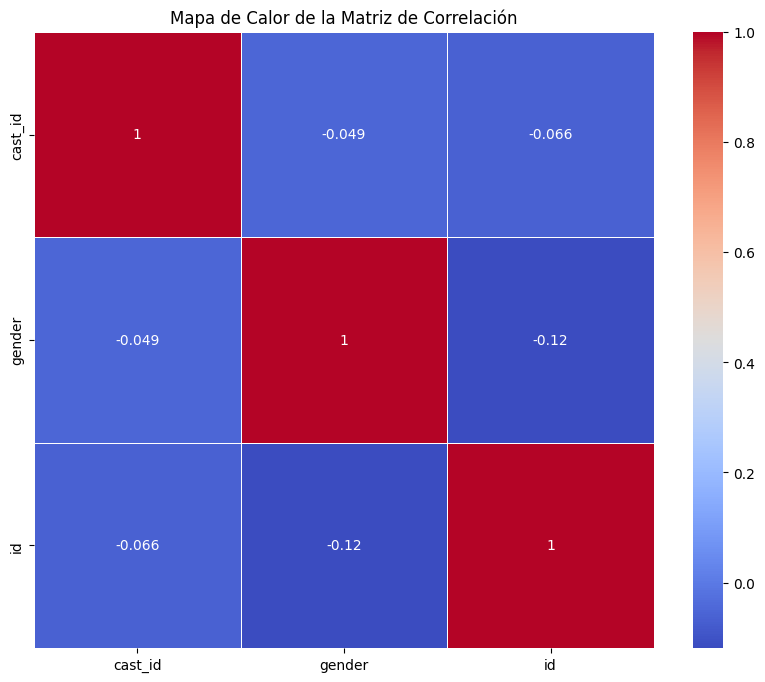

In [266]:
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

In [267]:
# Correlaciones entre datos en Crew
'''Este dataset solo tiene 1 columna con valor numérico que es ID,
por lo que no se puede realizar un anáilis de correlaciones numéricas'''


'Este dataset solo tiene 1 columna con valor numérico que es ID,\npor lo que no se puede realizar un anáilis de correlaciones numéricas'

Por último visualizaremos un par de relaciones entre columnas, en este sector tendremos en cuenta que es mi visión
al respecto de los vínculos que podrían tener las columnas seleccionadas en cada item entre si con la intención
de conocer más nuestros datasets y tener en cuenta tanto para aplicar en el modelo de ML de nuestro sistema de 
recomendación como para simplemente conocer nuestros datasets.

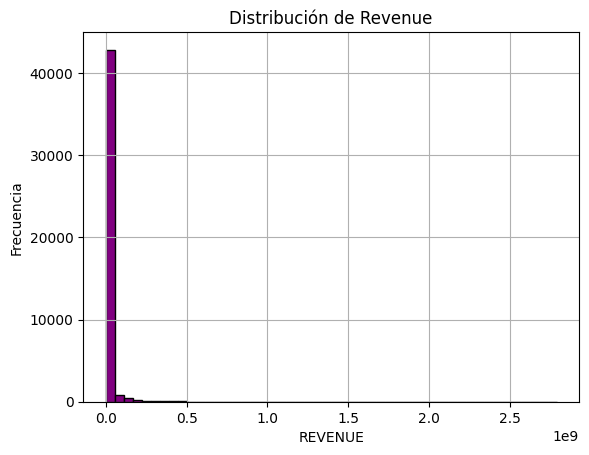

In [268]:
'''Análisis entre columnas (bivariado y multivariado)'''
# En primera instancia analizaremos la ganancia de las peliculas
# y observaremos lo que esta variable tiene para contarnos
df_movies_released['REVENUE'].hist(bins=50,color='purple', edgecolor='black')
plt.title('Distribución de Revenue')
plt.xlabel('REVENUE')
plt.ylabel('Frecuencia')
plt.show()

In [269]:
## Podremos observar que existen muchas peliculas en las que no se observan ganancias
# Por lo que contamos la cantidad de valores en cero en la columnas de ganancias para dimensionar
# para modificar el gráfico y lograr que sea más ilustrativo.
count_revenue_zero = df_movies_released['REVENUE'] == 0.0
print(count_revenue_zero.sum())

37541


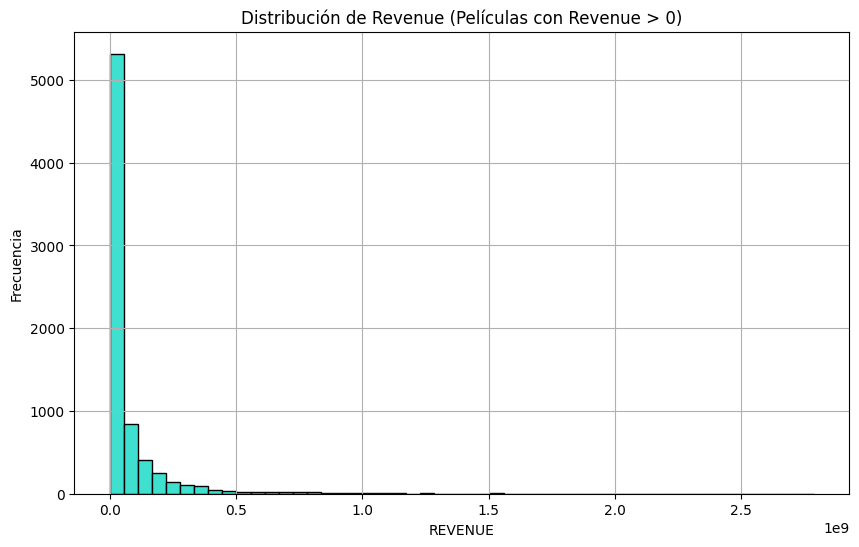

In [270]:
# Filtramos las películas que tienen revenue mayor a 0 para un mejor análisis
df_revenue_positive = df_movies_released[df_movies_released['REVENUE'] > 0]

# Creamos el histograma solo con películas que tienen revenue mayor a 0
plt.figure(figsize=(10, 6))
df_revenue_positive['REVENUE'].hist(bins=50, color='turquoise', edgecolor='black')
plt.title('Distribución de Revenue (Películas con Revenue > 0)')
plt.xlabel('REVENUE')
plt.ylabel('Frecuencia')
plt.show()

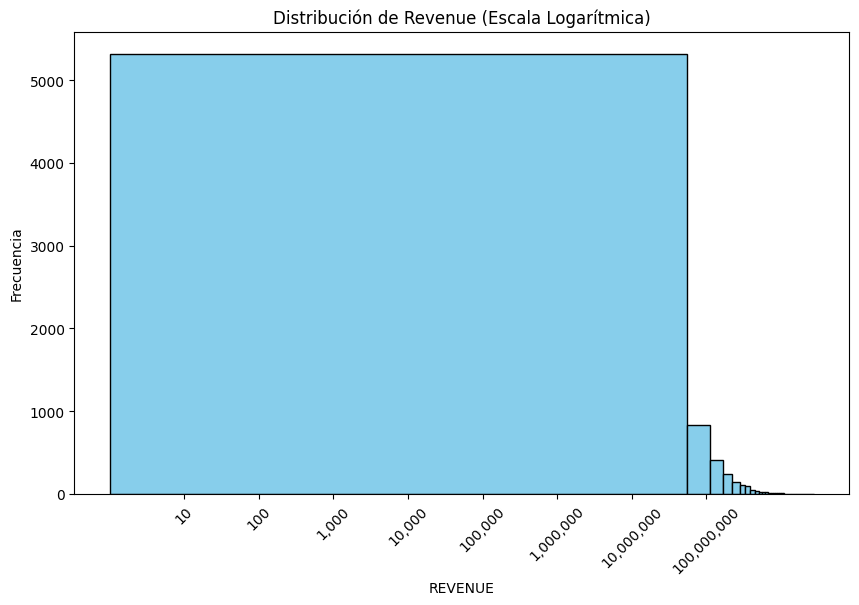

In [271]:
# Utilizamos nuevamente el revenue mayor a 0
plt.figure(figsize=(10, 6))
plt.hist(df_revenue_positive['REVENUE'], bins=50, color='skyblue', edgecolor='black')

# Usamos una escala logarítmica para el eje X internamente para tener una mejor comprensión de los datos visualizados
plt.xscale('log')
plt.title('Distribución de Revenue (Escala Logarítmica)')
plt.xlabel('REVENUE')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Ajustamos los valores del eje X para que muestren los valores originales
ticks = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
plt.xticks(ticks, labels=[f'{int(t):,}' for t in ticks])

plt.show()

Ahora tenemos una mejor visualización sobre los valores que se manejan en Revenue.

In [272]:
'''Al desarrollar nuestra API nos piden seis funciones, en ellas una funcion se concentrará en devolver
datos sobre el Director de la pelicula dada.
En nuestro dataset Crew tenemos empleados que se desarrollan en diferentes áreas; nosotros seleccionaremos
la dirección, por lo que observaremos las diferentes áreas existentes en nuestro dataset para tener 
una noción más clara de su distribución.'''
# Obtenemos los valores únicos en la columna 'DEPARTMENT' 
print(df_filtered_credits_crew['department'].unique())

['Directing' 'Writing' 'Production' 'Editing' 'Art' 'Sound'
 'Visual Effects']


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\3839374008.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_counts.index, y=department_counts.values, palette="viridis")


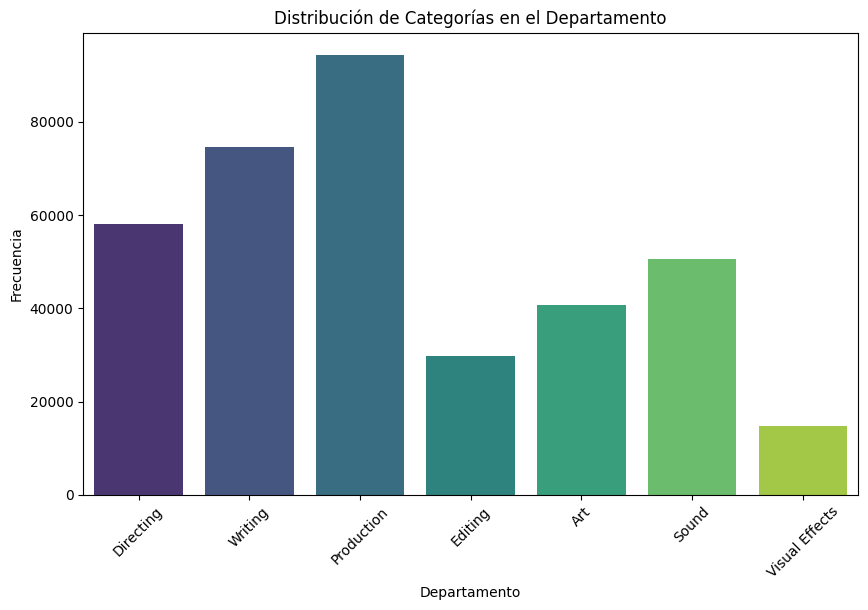

In [273]:
# Contamos la frecuencia de cada categoría en la columna 'DEPARTMENT'
department_counts = df_filtered_credits_crew['department'].value_counts()

# Filtrar solo las categorías de los valores únicos en 'DEPARTMENT'
categories_of_interest = ['Directing', 'Writing', 'Production', 'Editing', 'Art', 'Sound', 'Visual Effects']
department_counts = department_counts.loc[categories_of_interest]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette="viridis")
plt.title('Distribución de Categorías en el Departamento')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

A partir de ahora nos concentraremos en nuestro dataset Movies:
Buscaremos explorar sus columnas y relaciones

In [274]:
# Visualizamos datos básicos sobre el dataframe
# (No-nulos, tipos de columnas, cantidad de columnas y filas y uso de procesamiento de memoria)
print(df_movies_released.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BUDGET                           44936 non-null  float64
 1   ID                               44936 non-null  int64  
 2   ORIGINAL_LANGUAGE                44936 non-null  object 
 3   OVERVIEW                         44029 non-null  object 
 4   POPULARITY                       44936 non-null  float64
 5   RELEASE_DATE                     44936 non-null  object 
 6   REVENUE                          44936 non-null  float64
 7   RUNTIME                          44696 non-null  float64
 8   STATUS                           44936 non-null  object 
 9   TITLE                            44936 non-null  object 
 10  VOTE_AVERAGE                     44936 non-null  float64
 11  VOTE_COUNT                       44936 non-null  float64
 12  PRODUCTION_COMPANI

Del dataframe de movies destacamos dos tipos de analizis sobre las columnas: las que se analizan por separado y las que se comparan.

A analizar por separado:
BUDGET, ORIGINAL_LANGUAGE, POPULARITY, REVENUE, GENRES_NAME, RELEASE_YEAR

A analizar comparando:
BUDGET, REVENUE, VOTE_AVERAGE, VOTE_COUNT, RETURN

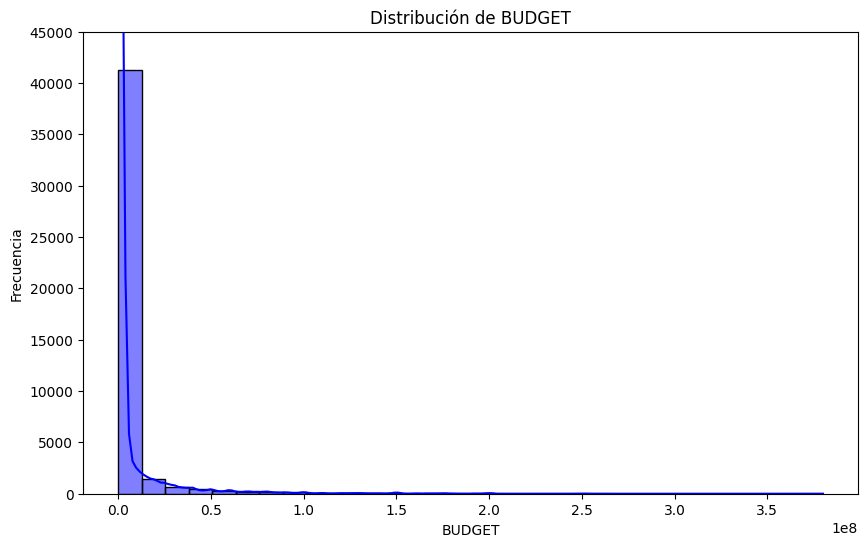

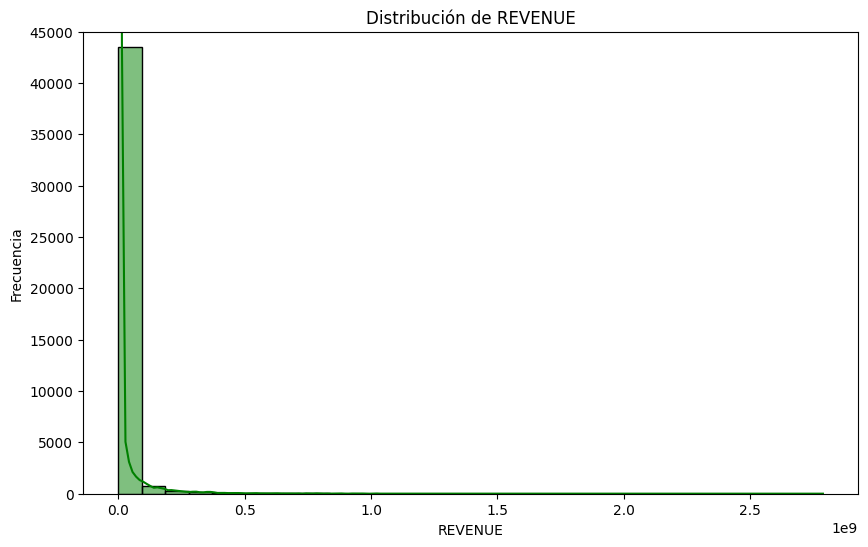

In [275]:
# Indagamos rápidamente sobre las columnas presupuesto y ganancia para tener una noción básica de su comportamiento
# Histograma para BUDGET
plt.figure(figsize=(10, 6))
sns.histplot(df_movies_released['BUDGET'], bins=30, kde=True, color='blue')
plt.ylim(0, 45000)
plt.title('Distribución de BUDGET')
plt.xlabel('BUDGET')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para REVENUE
plt.figure(figsize=(10, 6))
sns.histplot(df_movies_released['REVENUE'], bins=30, kde=True, color='green')
plt.ylim(0, 45000)
plt.title('Distribución de REVENUE')
plt.xlabel('REVENUE')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\1922527358.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movies_released, x='ORIGINAL_LANGUAGE', palette='viridis', order=df_movies_released['ORIGINAL_LANGUAGE'].value_counts().index)


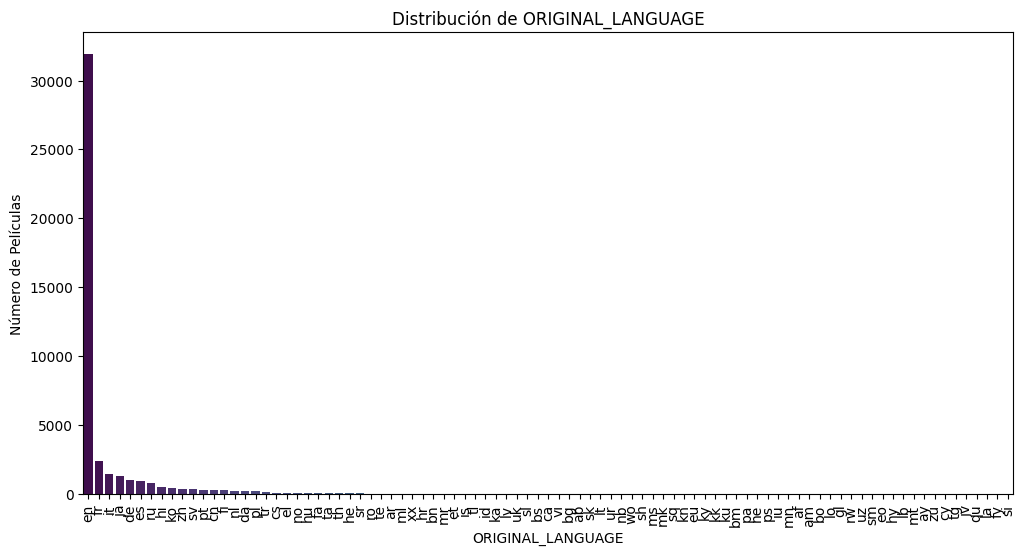

In [276]:
# Analizamos si es prudente tomar en cuenta el lenguaje original para nuestro sistema de recomendación
# Gráfico de barras para ORIGINAL_LANGUAGE
plt.figure(figsize=(12, 6))
sns.countplot(data=df_movies_released, x='ORIGINAL_LANGUAGE', palette='viridis', order=df_movies_released['ORIGINAL_LANGUAGE'].value_counts().index)
plt.title('Distribución de ORIGINAL_LANGUAGE')
plt.xlabel('ORIGINAL_LANGUAGE')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\102864384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movies_released, x='ORIGINAL_LANGUAGE', palette='viridis', order=top_20_languages)


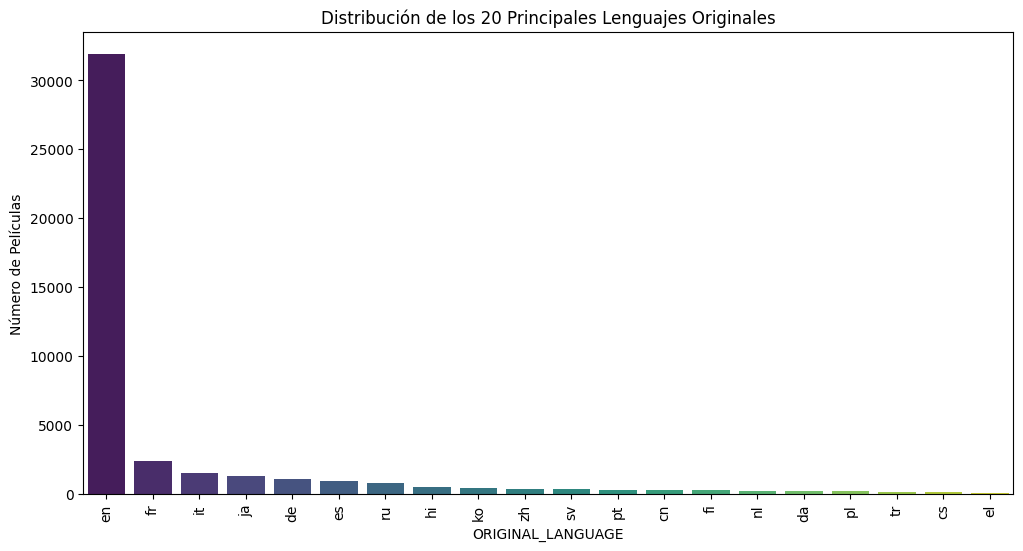

In [277]:
'''Vamos a tratar de darle una mejor visualización a nuestro gráfico de idiomas:'''
# Obtenemos los 20 lenguajes más comunes
top_20_languages = df_movies_released['ORIGINAL_LANGUAGE'].value_counts().nlargest(20).index

# Gráfico de barras para los 20 lenguajes más comunes
plt.figure(figsize=(12, 6))
sns.countplot(data=df_movies_released, x='ORIGINAL_LANGUAGE', palette='viridis', order=top_20_languages)
plt.title('Distribución de los 20 Principales Lenguajes Originales')
plt.xlabel('ORIGINAL_LANGUAGE')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\2540940675.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_df['LANGUAGE_NAME'] = top_20_df['ORIGINAL_LANGUAGE'].map(language_names).fillna(top_20_df['ORIGINAL_LANGUAGE'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\2540940675.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_20_df, x='LANGUAGE_NAME', palette='viridis', order=[language_names.get(lang, lang) for lang in top_20_languages])


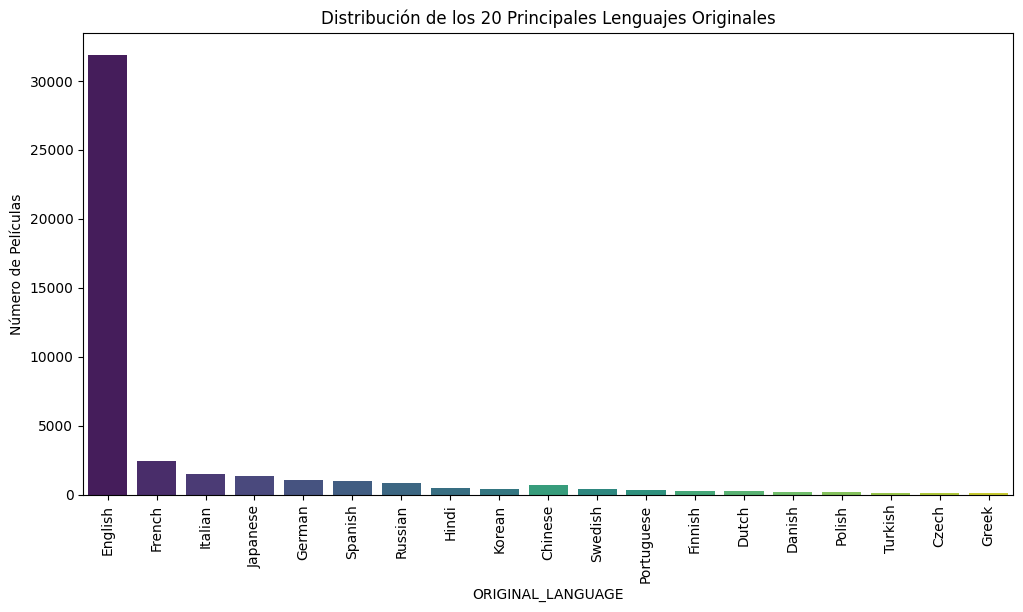

In [278]:
'''Generamos una lista con los nombres de los idiomas completos para que se entienda mejor.'''
# Diccionario de mapeo de códigos de idioma a nombres completos
language_names = {
    'en': 'English',
    'fr': 'French',
    'it': 'Italian',
    'ja': 'Japanese',
    'de': 'German',
    'es': 'Spanish',
    'ru': 'Russian',
    'hi': 'Hindi',
    'ko': 'Korean',
    'zh': 'Chinese',
    'sv': 'Swedish',
    'pt': 'Portuguese',
    'cn': 'Chinese',  # Generalmente se usa 'zh' para Chino, pero mantendremos la división para no asumir erroneamente
    'fi': 'Finnish',
    'nl': 'Dutch',
    'da': 'Danish',
    'pl': 'Polish',
    'tr': 'Turkish',
    'cs': 'Czech',
    'el': 'Greek'
}

# Filtramos el DataFrame para los 20 lenguajes más comunes
top_20_df = df_movies_released[df_movies_released['ORIGINAL_LANGUAGE'].isin(top_20_languages)]

# Mapeamos los códigos de idioma a nombres completos solo para la visualización
top_20_df['LANGUAGE_NAME'] = top_20_df['ORIGINAL_LANGUAGE'].map(language_names).fillna(top_20_df['ORIGINAL_LANGUAGE'])

# Gráfico de barras para los 20 lenguajes más comunes con nombres completos
plt.figure(figsize=(12, 6))
sns.countplot(data=top_20_df, x='LANGUAGE_NAME', palette='viridis', order=[language_names.get(lang, lang) for lang in top_20_languages])
plt.title('Distribución de los 20 Principales Lenguajes Originales')
plt.xlabel('ORIGINAL_LANGUAGE')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.show()

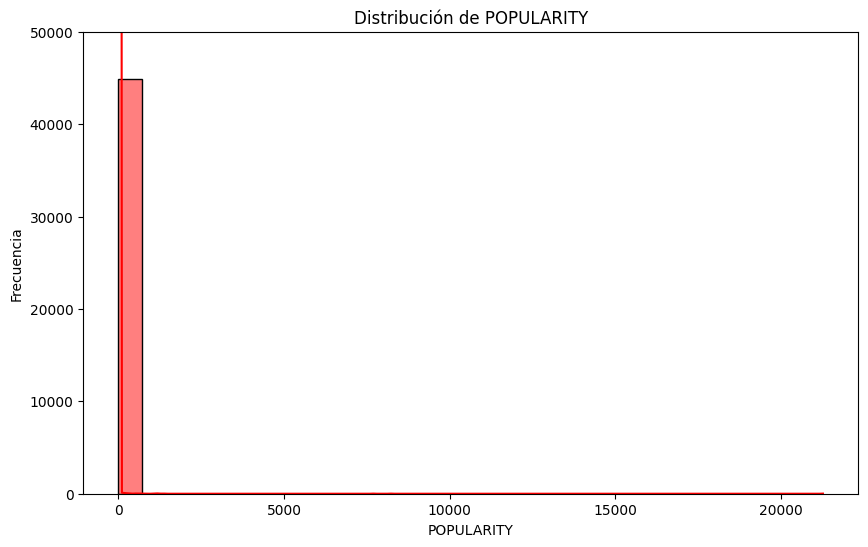

In [279]:
# Analizamos el comportamiento de POPULARITY para utilizarla en nuestro sistema de recomendación
# Histograma para POPULARITY
plt.figure(figsize=(10, 6))
sns.histplot(df_movies_released['POPULARITY'], bins=30, kde=True, color='red')
plt.ylim(0, 50000)
plt.title('Distribución de POPULARITY')
plt.xlabel('POPULARITY')
plt.ylabel('Frecuencia')
plt.show()

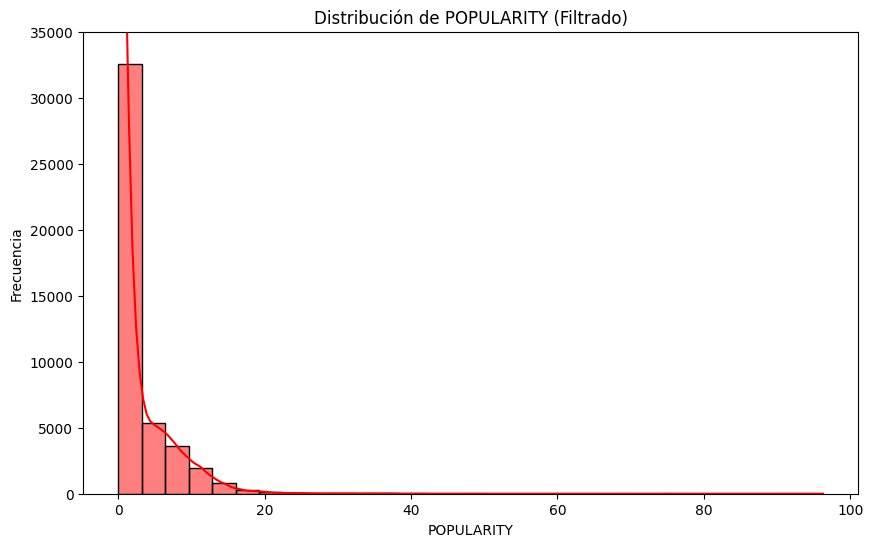

In [280]:
# Ya que un gráfico de barras básico no nos permite una correcta visualización de los valores en Popularity
# filtramos los valores de POPULARITY por debajo de un valor seleccionado
popularity_filtered = df_movies_released[df_movies_released['POPULARITY'] < 100]

# Histograma para POPULARITY filtrado
plt.figure(figsize=(10, 6))
sns.histplot(popularity_filtered['POPULARITY'], bins=30, kde=True, color='red')
plt.ylim(0, 35000)
plt.title('Distribución de POPULARITY (Filtrado)')
plt.xlabel('POPULARITY')
plt.ylabel('Frecuencia')
plt.show()

In [281]:
# Observamos valores númericos de Popularity
df_movies_released['POPULARITY']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
44931     5.683753
44932     0.178241
44933     0.903007
44934     0.003503
44935     0.163015
Name: POPULARITY, Length: 44936, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\2177577454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


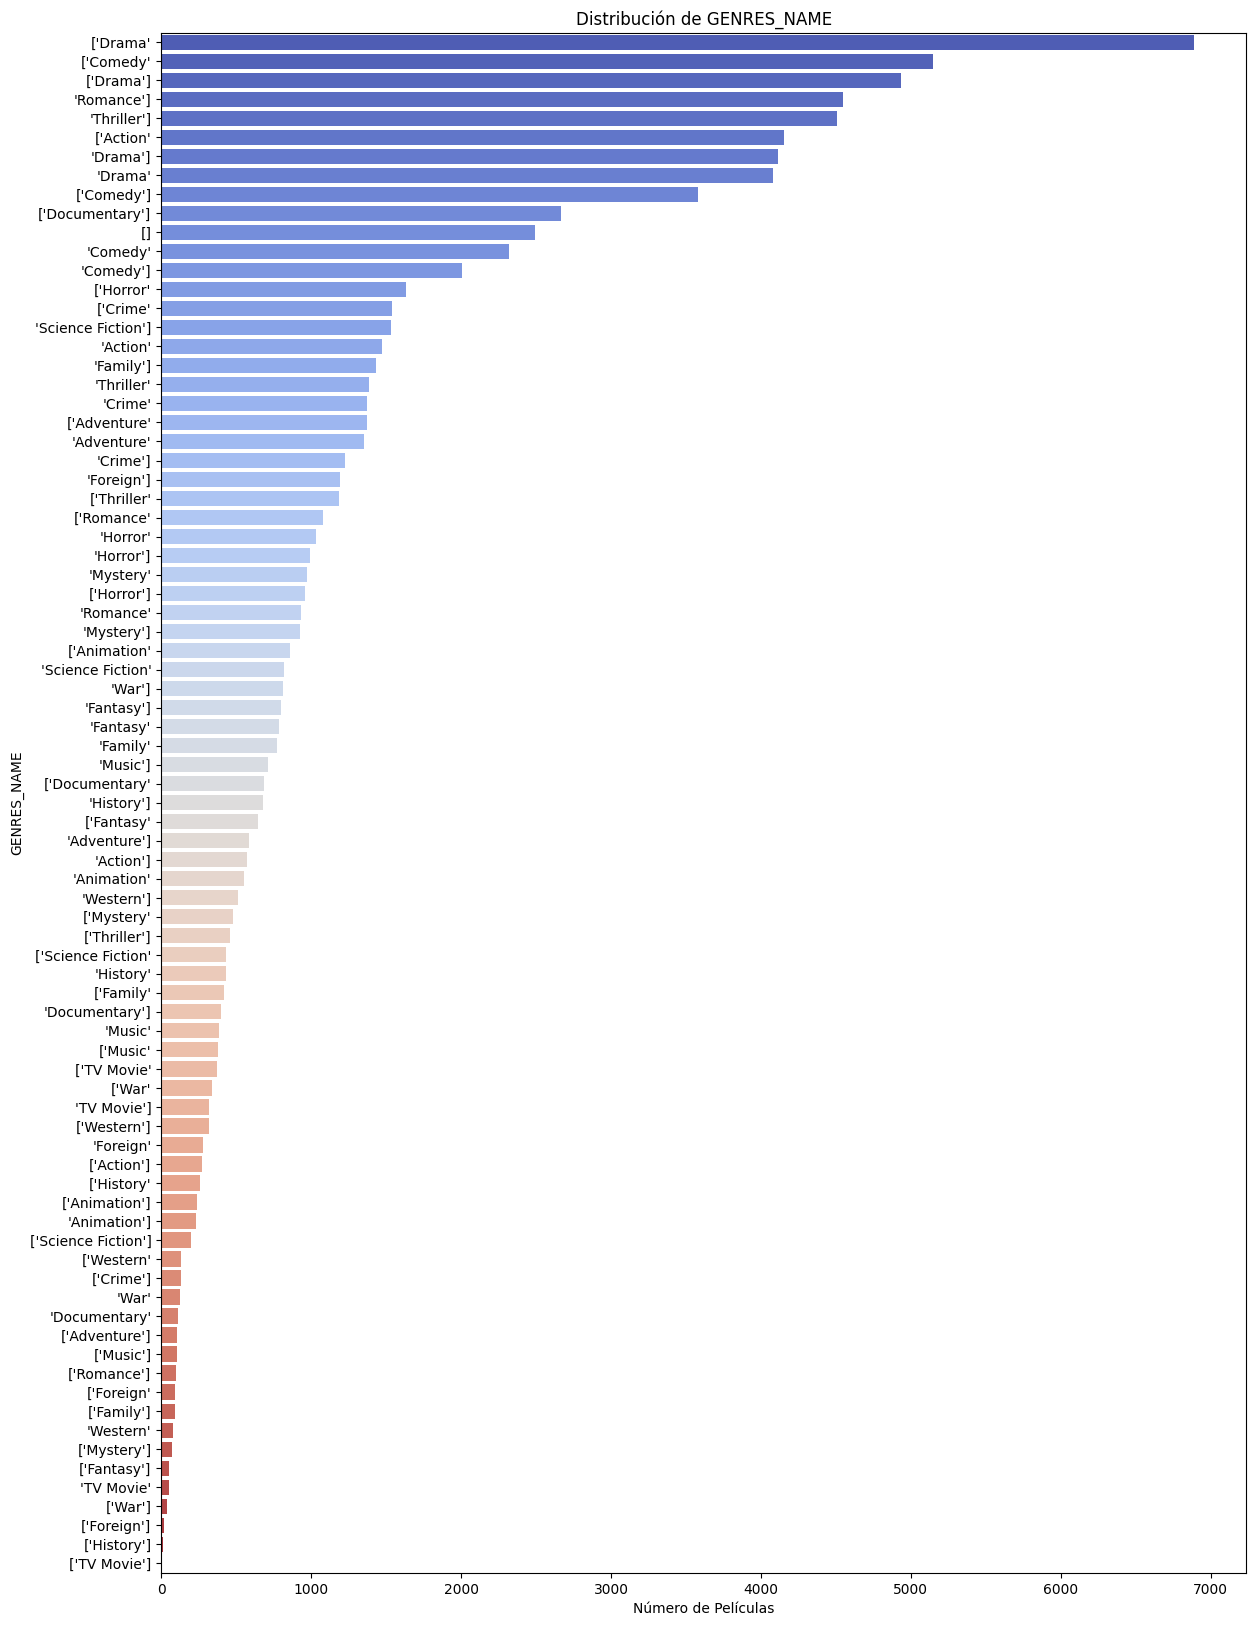

In [282]:
'''Vamos a analizar la columna de generos para considerarla para el modelo de recomendación'''
# Nos aseguramos de que GENRES_NAME esté en un formato adecuado (ej: lista de géneros separados por comas)
df_movies_released['GENRES_NAME'] = df_movies_released['GENRES_NAME'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Contamos la frecuencia de cada género
genre_counts = df_movies_released['GENRES_NAME'].str.split(', ').explode().value_counts()

# Gráfico de barras para GENRES_NAME
plt.figure(figsize=(14, 20))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Distribución de GENRES_NAME')
plt.xlabel('Número de Películas')
plt.ylabel('GENRES_NAME')
plt.show()

In [283]:
'''En el gráfico anterior vemos que no se puede hacer el análisis según genero
debido al formato de listas en la columna GENRES_NAME,
por lo que trabajaremos la columna para poder analizarla correctamente'''

import ast

# Convertimos la columna de cadenas en listas, si es necesario
df_movies_released['GENRES_NAME'] = df_movies_released['GENRES_NAME'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explotamos la columna para que cada género esté en su propia fila
df_genres_exploded = df_movies_released.explode('GENRES_NAME')

# Almacenamos en el df creado únicamente la columna que nos interesa
df_genres_exploded = df_genres_exploded['GENRES_NAME']

# Confirmamos que el proceso se haya realizado correctamente
df_genres_exploded

0        Animation
0           Comedy
0           Family
1        Adventure
1          Fantasy
           ...    
44933       Action
44933        Drama
44933     Thriller
44934          NaN
44935          NaN
Name: GENRES_NAME, Length: 92341, dtype: object

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5488\1495999989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


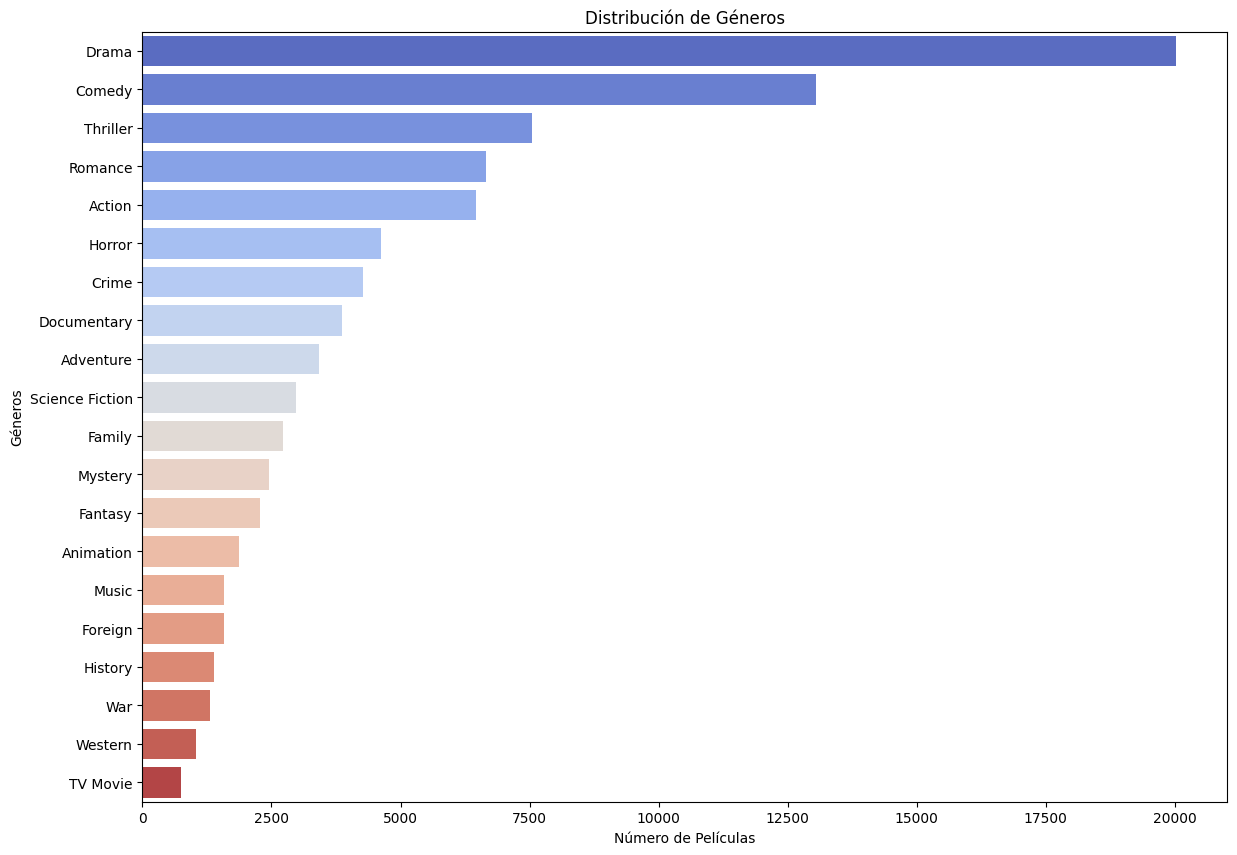

In [284]:
# Contamos la frecuencia de cada género
genre_counts = df_genres_exploded.value_counts()

# Graficamos los resultados
plt.figure(figsize=(14, 10))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Distribución de Géneros')
plt.xlabel('Número de Películas')
plt.ylabel('Géneros')
plt.show()

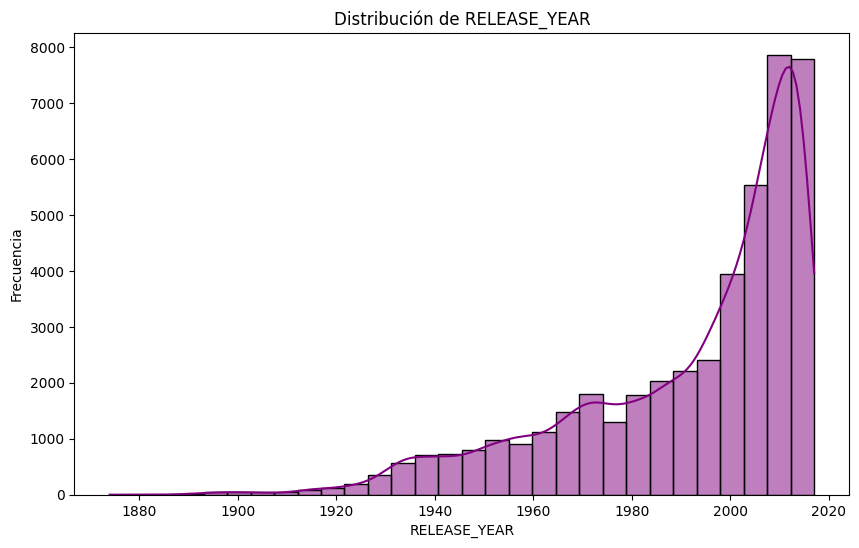

In [285]:
# Analizamos el comportamiento de POPULARITY para utilizarla en nuestro sistema de recomendación
# Histograma para RELEASE_YEAR
plt.figure(figsize=(10, 6))
sns.histplot(df_movies_released['RELEASE_YEAR'], bins=30, kde=True, color='purple')
plt.title('Distribución de RELEASE_YEAR')
plt.xlabel('RELEASE_YEAR')
plt.ylabel('Frecuencia')
plt.show()

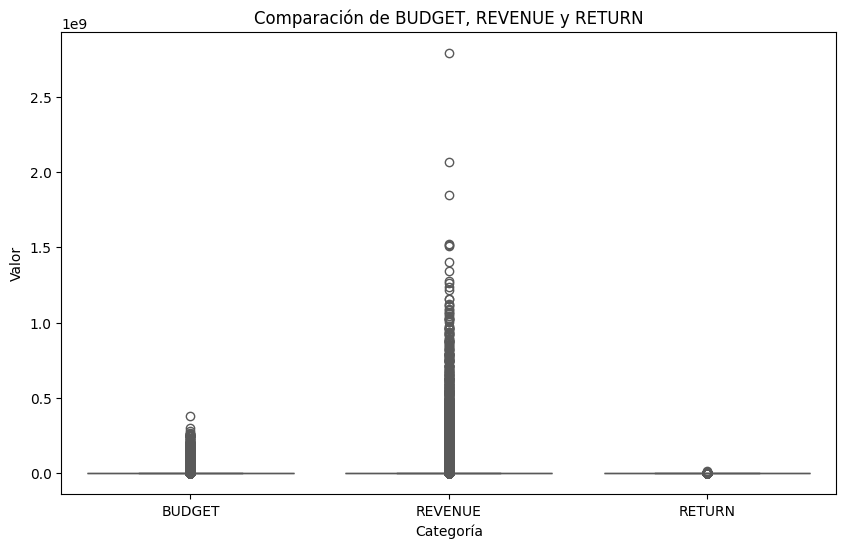

In [286]:
'''Comparamos nuestras columnas que hablan sobre el aspecto ganancial de nuestro dataset Movies'''
# Crear un dataframe reducido para las columnas de interés
df_budget_revenue_return = df_movies_released[['BUDGET', 'REVENUE', 'RETURN']]

# Crear un gráfico de boxplot para comparar las distribuciones
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_budget_revenue_return, palette="Set2")
plt.title('Comparación de BUDGET, REVENUE y RETURN')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

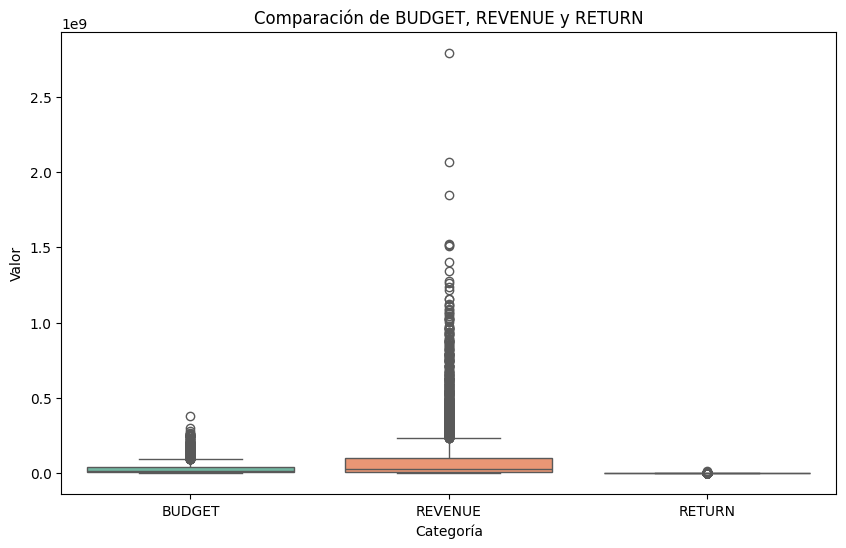

In [287]:
'''Ya que es dificil la visualización debido a la cantidad de valores en cero de estas columnas
buscamos filtrar los datos mayores a cero para tener una mejor comprensión de la situación'''
# Filtrar filas donde los valores en las columnas 'BUDGET', 'REVENUE', y 'RETURN' son mayores que cero
df_budget_revenue_return_positive = df_budget_revenue_return[
    (df_budget_revenue_return['BUDGET'] > 0) &
    (df_budget_revenue_return['REVENUE'] > 0) &
    (df_budget_revenue_return['RETURN'] > 0)
]

# Mostrar las primeras filas del DataFrame filtrado para verificar
#print(df_revenue_positive.head())

# Crear un gráfico de boxplot para comparar las distribuciones
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_budget_revenue_return_positive, palette="Set2")
plt.title('Comparación de BUDGET, REVENUE y RETURN')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

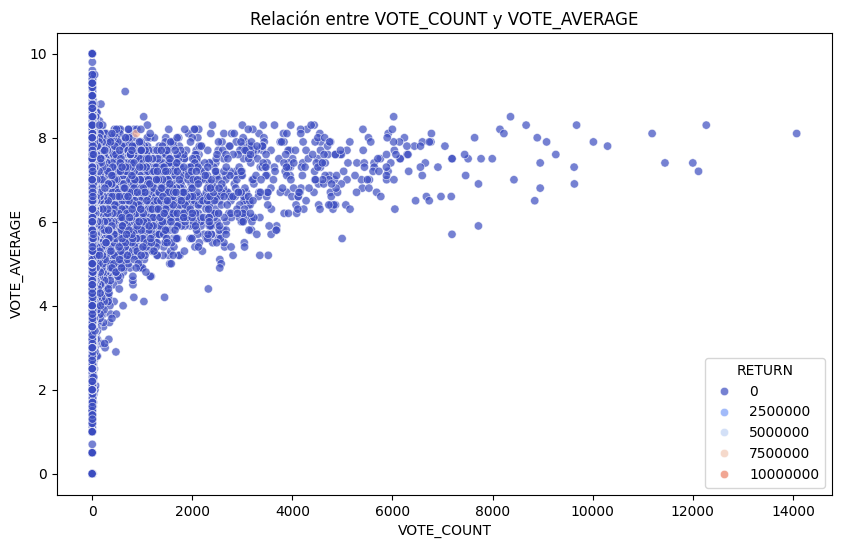

In [288]:
'''Buscamos también una visualización sobre las columnas relacionadas con los votos
(también buscando tener en cuenta la ganancia de cada película)'''
# Creamos un gráfico de dispersión para comparar VOTE_AVERAGE y VOTE_COUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_movies_released['VOTE_COUNT'], y=df_movies_released['VOTE_AVERAGE'], hue=df_movies_released['RETURN'], palette="coolwarm", alpha=0.7)
plt.title('Relación entre VOTE_COUNT y VOTE_AVERAGE')
plt.xlabel('VOTE_COUNT')
plt.ylabel('VOTE_AVERAGE')
plt.show()

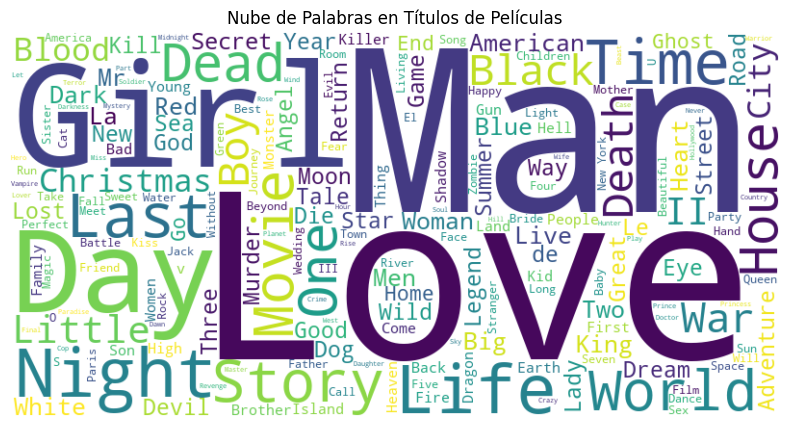

In [289]:
'''Analizamos los titulos de las peliculas para tener una noción de patrones posibles'''
# Importamos la biblioteca WordCloud para generar la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Importamos matplotlib para visualizar la nube de palabras

# Unimos todos los títulos de las películas en una sola cadena de texto
text = ' '.join(df_movies_released['TITLE'])

# Creamos un objeto WordCloud
# Ajustamos el ancho y alto de la imagen de la nube de palabras, y el color de fondo a blanco
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Configuramos el tamaño de la figura para la visualización
plt.figure(figsize=(10, 5))

# Mostramos la nube de palabras en la figura
# 'interpolation='bilinear'' mejora la calidad visual de la imagen
plt.imshow(wordcloud, interpolation='bilinear')

# Ocultamos los ejes para una mejor visualización de la nube de palabras
plt.axis('off')

# Establecemos el título del gráfico
plt.title('Nube de Palabras en Títulos de Películas')

# Mostramos el gráfico
plt.show()

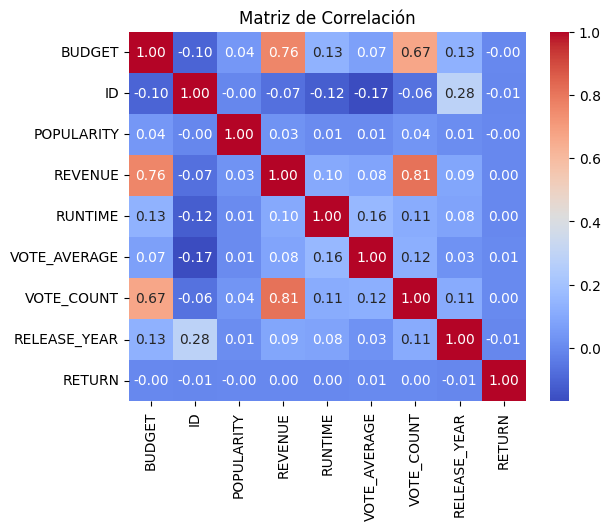

In [290]:
'''Por último buscamos correlación entre las columnas númericas de Movies'''
# Seleccionamos solo columnas numéricas
df_numeric = df_movies_released.select_dtypes(include=['number'])

# Calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()

# Creamos el gráfico de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()